# **Project Brief: Analyzing Booking Data for Splendor Hotel Groups (SHG)**

**Splendor Hotel Groups have recently recruited me as a Business Intelligence Analyst to help make sense of their data to see how I can use my skills to reveal important insights buried within. My job is to perform a thorough analysis of a large dataset that includes financial metrics, guest profiles, distribution networks, and detailed information about bookings. Through the use of my analytical skills, we hope to derive significant insights that will guide both operational and overall improvements, helping SHG to continue its unmatched hospitality.**

# **Importing Libraries**

In [1]:
# importing of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# **Data Cleaning**

In [3]:
# loading data into pandas dataframe and exploring columns and first rows
df = pd.read_excel('SHG_Booking_Data.xlsx')
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [4]:
# renaming columns to have all lowercase
df.columns = [col.lower() for col in df.columns]

# looking at dtypes, we can see all of them are pandas objects except for age that is int.
print(df.dtypes)

booking id                       int64
hotel                           object
booking date            datetime64[ns]
arrival date            datetime64[ns]
lead time                        int64
nights                           int64
guests                           int64
distribution channel            object
customer type                   object
country                         object
deposit type                    object
avg daily rate                 float64
status                          object
status update           datetime64[ns]
cancelled (0/1)                  int64
revenue                        float64
revenue loss                   float64
dtype: object


In [6]:
# Count of null values in each column
null_counts = df.isnull().sum()
# Display only columns with at least one null value
print(null_counts[null_counts > 0])

country    488
dtype: int64


In [8]:
# Replace NaN in the 'country' column with 'Unknown'
df['country'] = df['country'].fillna('Unknown')
print(df['country'].isna().sum())

0


In [10]:
# View unique entries in the 'status' column
print(df['status'].unique())

['Check-Out' 'Canceled' 'No-Show']


In [11]:
# Convert to datetime to date
df['booking date'] = df['booking date'].dt.date
df['arrival date'] = df['arrival date'].dt.date
df['status update'] = df['status update'].dt.date

In [13]:
# Create a new column 'net revenue'
df['net revenue'] = df['revenue'] + df['revenue loss']

In [14]:
print(df.dtypes)

booking id                int64
hotel                    object
booking date             object
arrival date             object
lead time                 int64
nights                    int64
guests                    int64
distribution channel     object
customer type            object
country                  object
deposit type             object
avg daily rate          float64
status                   object
status update            object
cancelled (0/1)           int64
revenue                 float64
revenue loss            float64
net revenue             float64
dtype: object


# **Data Analysis and Insight Generation**

**1.Booking Patterns:**

**●What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?**

**●How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?**


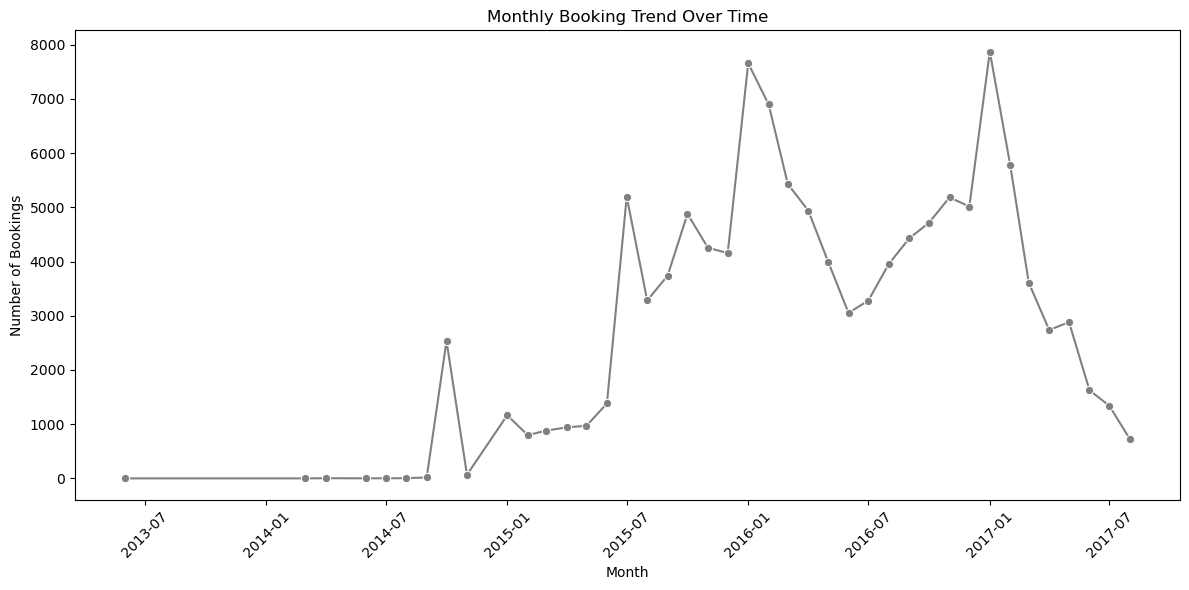

In [24]:
# Ensure the 'booking date' column is in datetime format
df['booking date'] = pd.to_datetime(df['booking date'], errors='coerce')
# Extract year and month from booking date
df['booking month'] = df['booking date'].dt.to_period('M')
# Convert 'booking month' to datetime before grouping
df['booking month'] = df['booking month'].dt.to_timestamp()
# Count bookings per month
monthly_bookings = df.groupby('booking month').size().reset_index(name='Number of Bookings')
# Plot the monthly booking trend with a custom color
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_bookings, x='booking month', y='Number of Bookings', marker='o', color='grey')
plt.title('Monthly Booking Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHT**

**January 2017 had the highest number of bookings while July 2013 till July 2014 had the lowest bookings. 
It is notable that 2017 had fewer bookings than 2016 most likely because the last data on record was in August of the same year.**

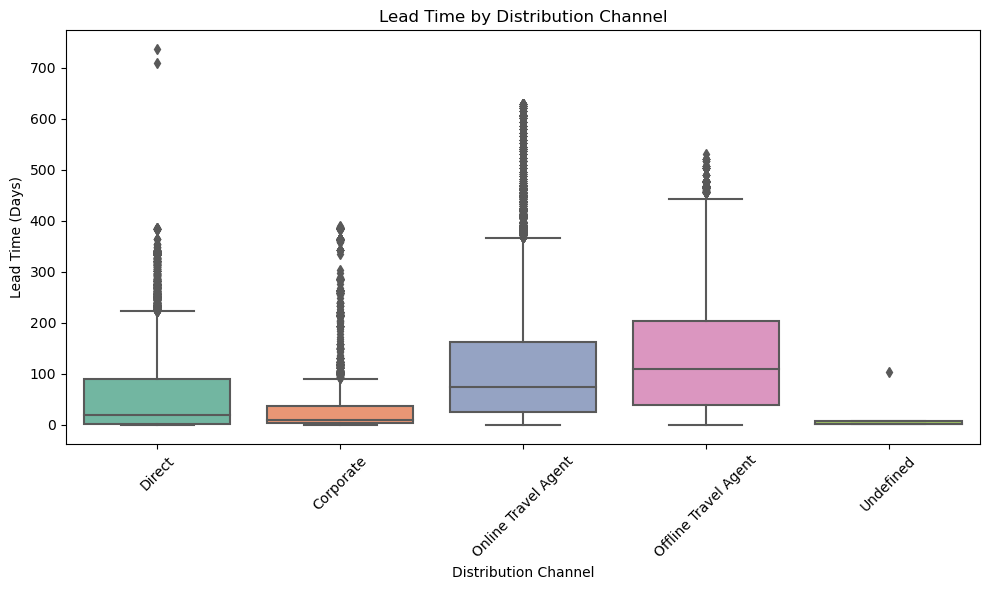

In [25]:
# Lead Time across Booking Channels
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='distribution channel', y='lead time', palette='Set2')  # You can replace 'Set2' with any other palette name
plt.title('Lead Time by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

**Offline and Online Travel Agents tend to handle bookings made much earlier in advance compared to Direct and Corporate channels.
Corporate bookings are mostly last-minute or close to the arrival date.**

**There is a significant number of outliers across all channels, especially for the travel agents.**

**Direct bookings are generally shorter in lead time but show occasional long-term bookings.**

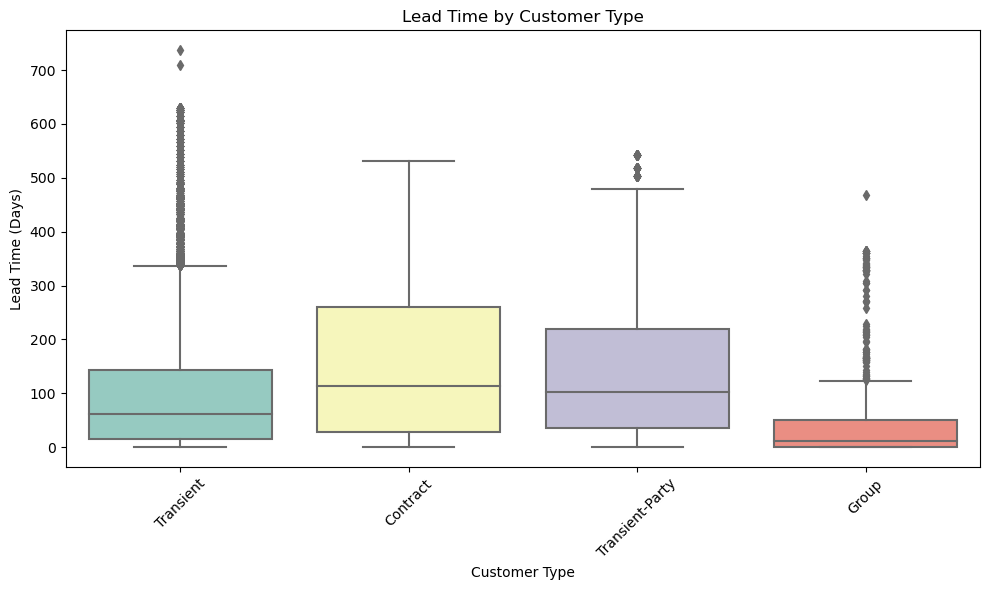

In [27]:
# Lead Time across Customer Types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='customer type', y='lead time', palette='Set3')
plt.title('Lead Time by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

**1. Contract and Transient-Party customers generally book much earlier than others.**

**2. Group customers book closer to their arrival dates.**

**3. Transient customers show the widest range in behavior, with both short- and long-term bookings.**

**4. Every category contains outliers, showing that exceptional booking behaviors exist in each group.**

**2. Customer Behavior Analysis:**
    
**●Which distribution channels contribute the most to bookings, and how does the average daily rate (ADR) differ across these channels?**

**●Can we identify any patterns in the distribution of guests based on their country of origin, and how does this impact revenue?**


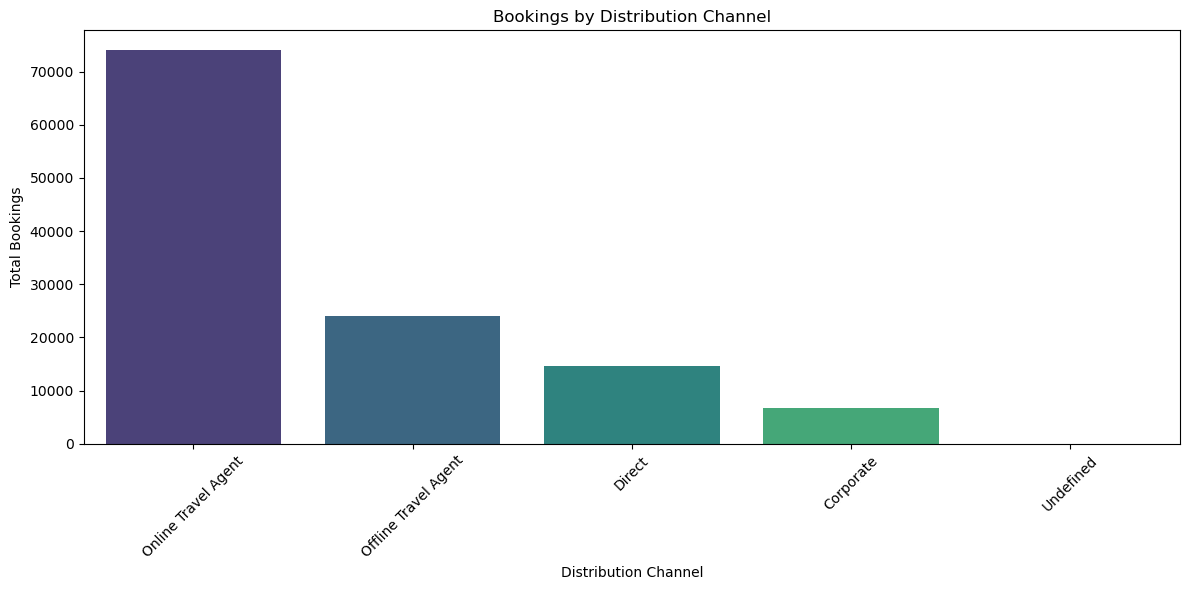

In [29]:
# Group by distribution channel and calculate the total number of bookings and average ADR
channel_analysis = df.groupby('distribution channel').agg(
    total_bookings=('booking id', 'size'),
    avg_adr=('avg daily rate', 'mean')
).reset_index()

# Sort by total bookings to see which channels contribute the most
channel_analysis = channel_analysis.sort_values(by='total_bookings', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(data=channel_analysis, x='distribution channel', y='total_bookings', palette='viridis')
plt.title('Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

**The most common distribution channel utilized by guests was the Online Travel Agent channel,  while the least commonly utilized channel is the Corporate channel (Undefined refers to the distribution channel that was not recorded in the dataset).** 

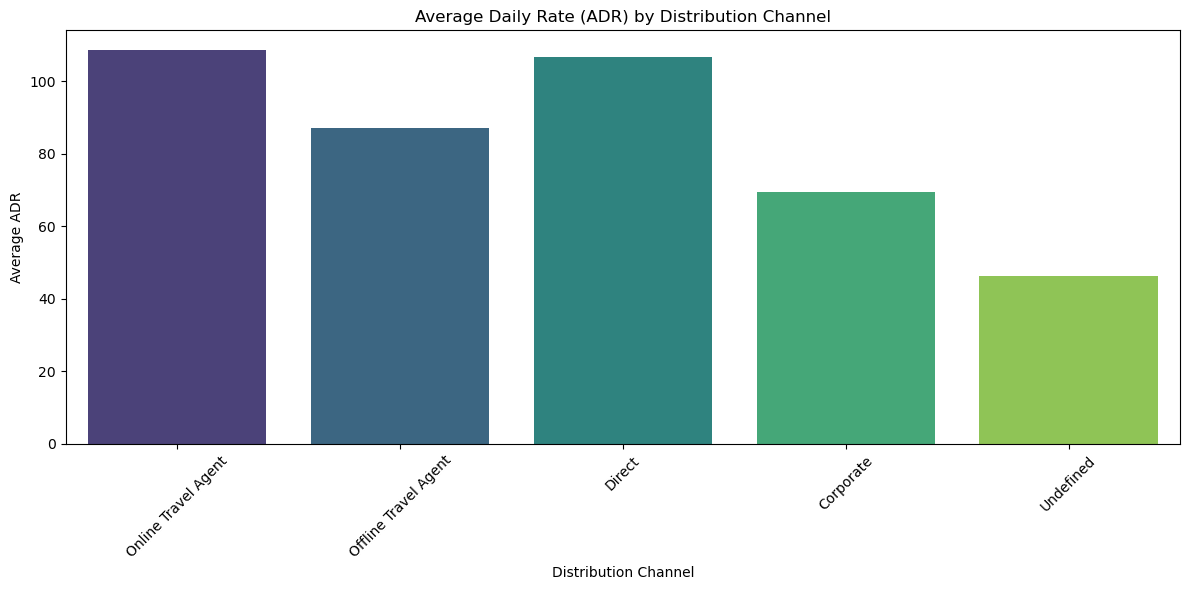

In [30]:
# Plot ADR by Distribution Channel
plt.figure(figsize=(12, 6))
sns.barplot(data=channel_analysis, x='distribution channel', y='avg_adr', palette='viridis')
plt.title('Average Daily Rate (ADR) by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

**Among these channels, the Online Travel Agent distribution channel had the highest Average Daily Rate while Corporate had the least ADR among the defined channels. (Undefined refers to the distribution channel that was not recorded in the dataset).**

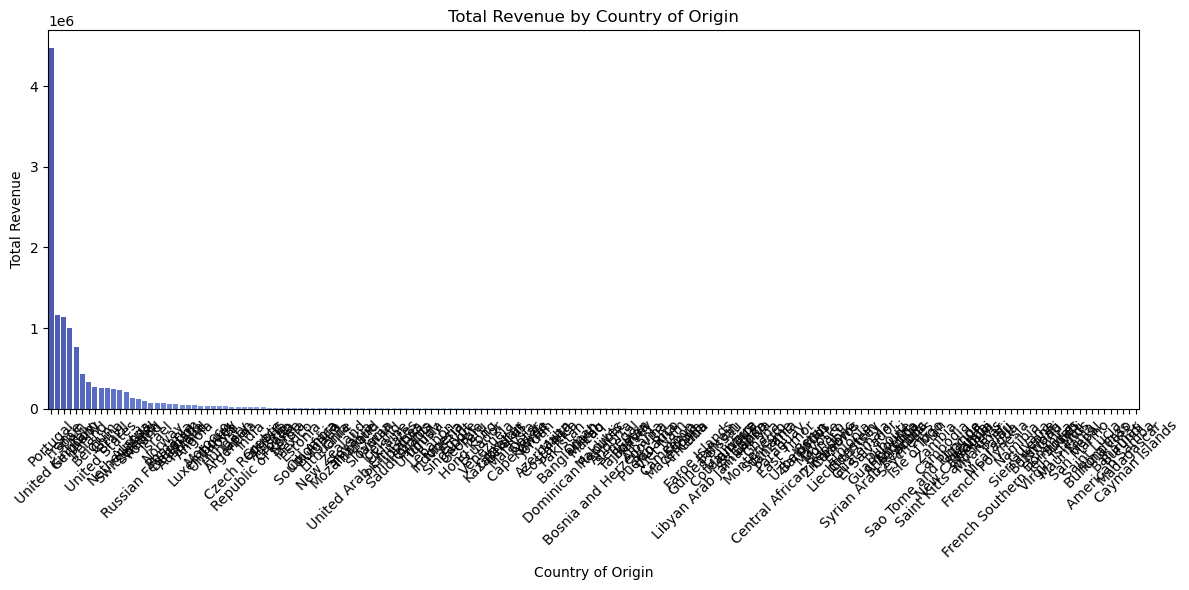

In [35]:
# Group by country of origin and calculate the total revenue and average revenue per guest
country_analysis = df.groupby('country').agg(
    total_revenue=('avg daily rate', 'sum'),
    avg_revenue_per_guest=('avg daily rate', 'mean'),
    total_guests=('booking id', 'size')
).reset_index()
# Sort by total revenue to see which countries contribute the most to revenue
country_analysis = country_analysis.sort_values(by='total_revenue', ascending=False)
# Plotting the total revenue by country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_analysis, x='country', y='total_revenue', palette='coolwarm')
plt.title('Total Revenue by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

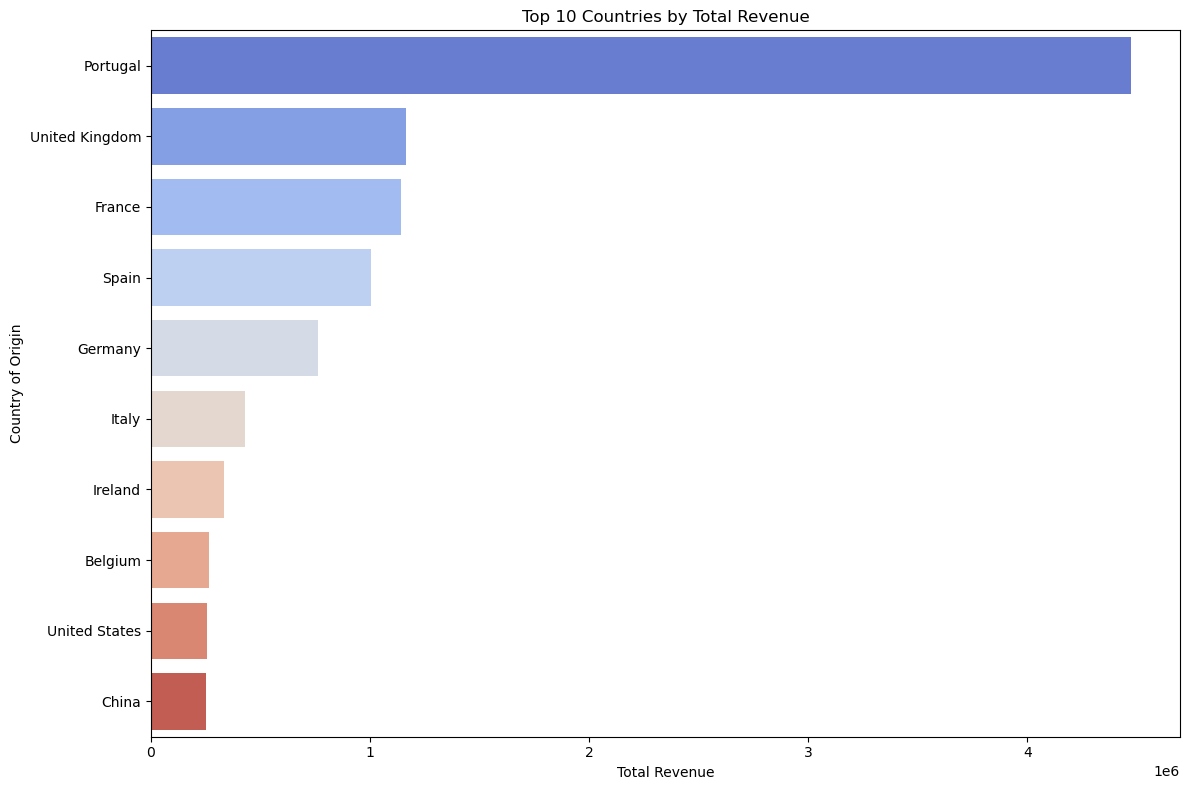

In [38]:
# Select the top 10 of total revenue by guests 
top_countries = country_analysis.head(10) 
# Plotting the total revenue by country using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='total_revenue', y='country', palette='coolwarm')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country of Origin')
plt.tight_layout()
plt.show()

**INSIGHTS**

**Yes, clear patterns emerge when analyzing the distribution of guests by country of origin, with significant implications for revenue generation.**

**Portugal accounts for the highest number of guests.**

**International Travelers, though fewer in number, these guests often result in higher average revenue per booking.They may book premium rooms and stay longer, compensating for lower visit frequency.Their presence indicates opportunities for luxury package deals or cross-border partnerships.**

**Revenue projections can be segmented by region to better allocate marketing and operational resources.**

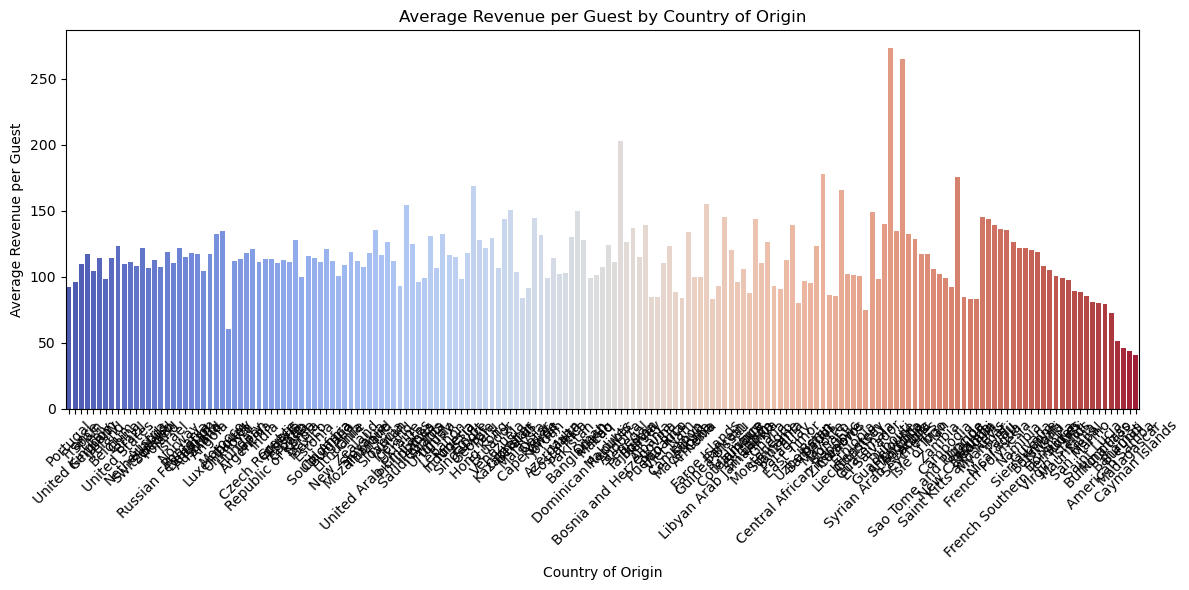

In [42]:
# Plot average revenue per guest by country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_analysis, x='country', y='avg_revenue_per_guest', palette='coolwarm')
plt.title('Average Revenue per Guest by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Average Revenue per Guest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

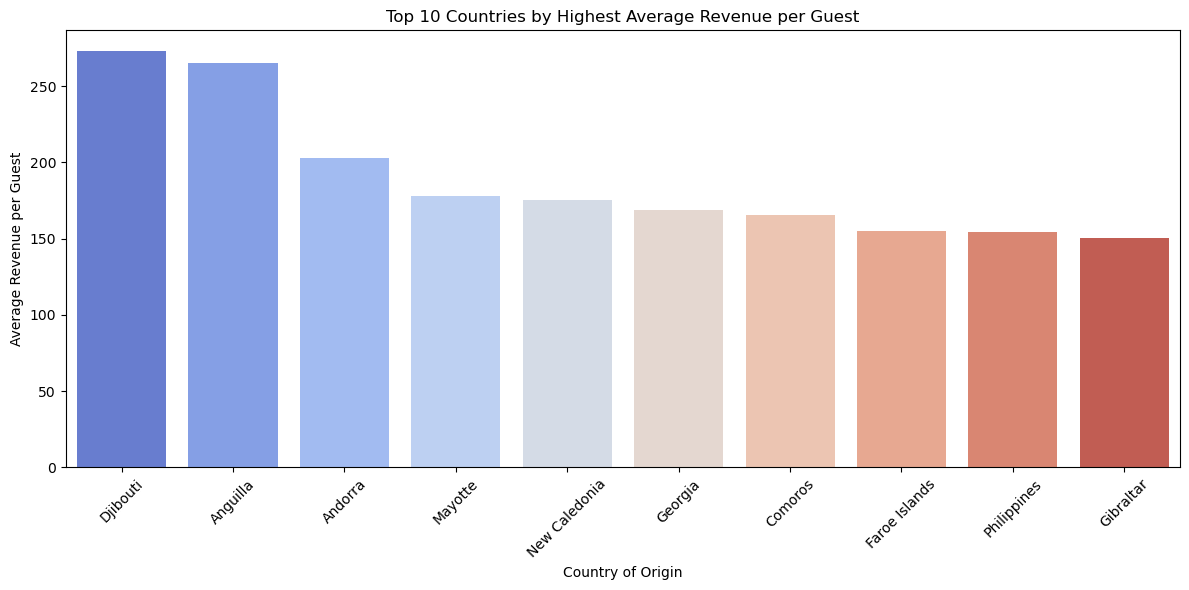

In [43]:
# Sort the data by average revenue per guest in descending order
top_countries_revenue = country_analysis.sort_values(by='avg_revenue_per_guest', ascending=False).head(10)  # Use .head(20) for the top 20 countries

# Plotting the average revenue per guest by country using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries_revenue, x='country', y='avg_revenue_per_guest', palette='coolwarm')
plt.title('Top 10 Countries by Highest Average Revenue per Guest')
plt.xlabel('Country of Origin')
plt.ylabel('Average Revenue per Guest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

**Djibouti has the highest average revenue per guest**

**3. Cancellation Analysis:**

**●What factors are most strongly correlated with cancellations, and can we predict potential cancellations based on certain variables?**

**●How does the revenue loss from cancellations compare across different customer segments and distribution channels?**


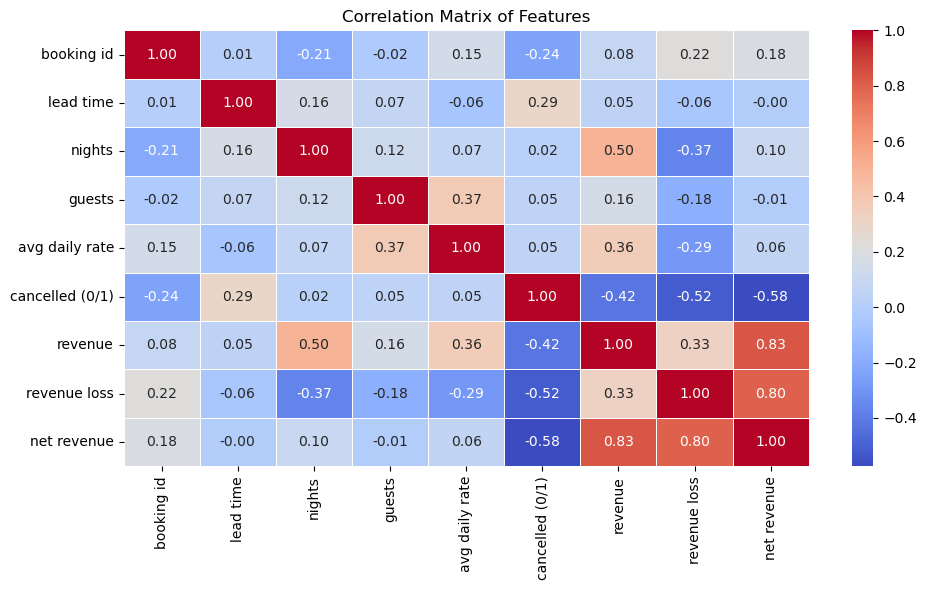

In [46]:
# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['number', 'float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [50]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['distribution channel', 'customer type', 'deposit type'], drop_first=True)

# Selecting features and target variable
X = df_encoded[
    ['lead time', 'avg daily rate', 'guests'] +
    list(df_encoded.columns[df_encoded.columns.str.startswith('distribution channel')]) +
    list(df_encoded.columns[df_encoded.columns.str.startswith('customer type')]) +
    list(df_encoded.columns[df_encoded.columns.str.startswith('deposit type')])
]
y = df_encoded['cancelled (0/1)']  # Target variable: 1 for cancellation, 0 for no cancellation

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                                      Feature  Importance
10                deposit type_Non Refundable    4.405012
5    distribution channel_Online Travel Agent    0.470067
2                                      guests    0.114869
6              distribution channel_Undefined    0.006967
0                                   lead time    0.004335
1                              avg daily rate    0.002751
11                    deposit type_Refundable   -0.005749
7                         customer type_Group   -0.146350
8                     customer type_Transient   -0.196896
4   distribution channel_Offline Travel Agent   -0.605463
9               customer type_Transient-Party   -0.721590
3                 distribution channel_Direct   -0.841233


C:\Users\Donation\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



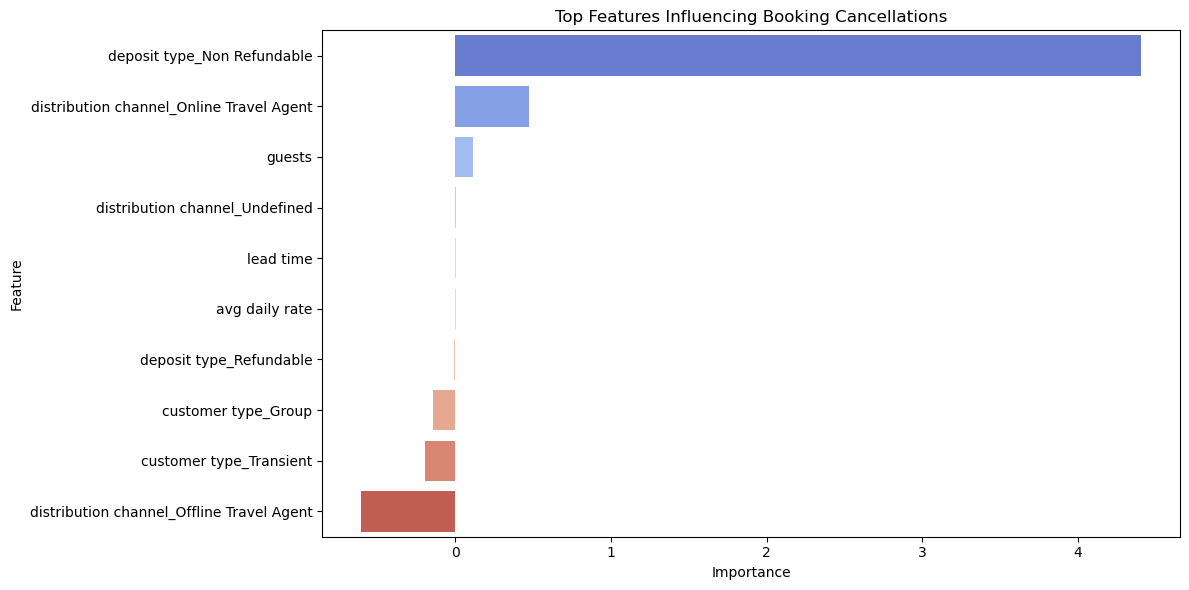

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='coolwarm')
plt.title('Top Features Influencing Booking Cancellations')
plt.tight_layout()
plt.show()

**INSIGHTS**

**The factors most strongly correlated with cancellations is Deposit Type: Non-Refundable. Surprisingly, even though bookings are non-refundable, many may still cancel, possibly due to automated or bulk bookings through agencies or speculative behavior.**

**Distribution Channel: Online Travel Agent is also highly associated with higher cancellation rates. This may be because Online Travel Agents often allow flexible cancellation policies and may encourage users to book multiple hotels simultaneously.**

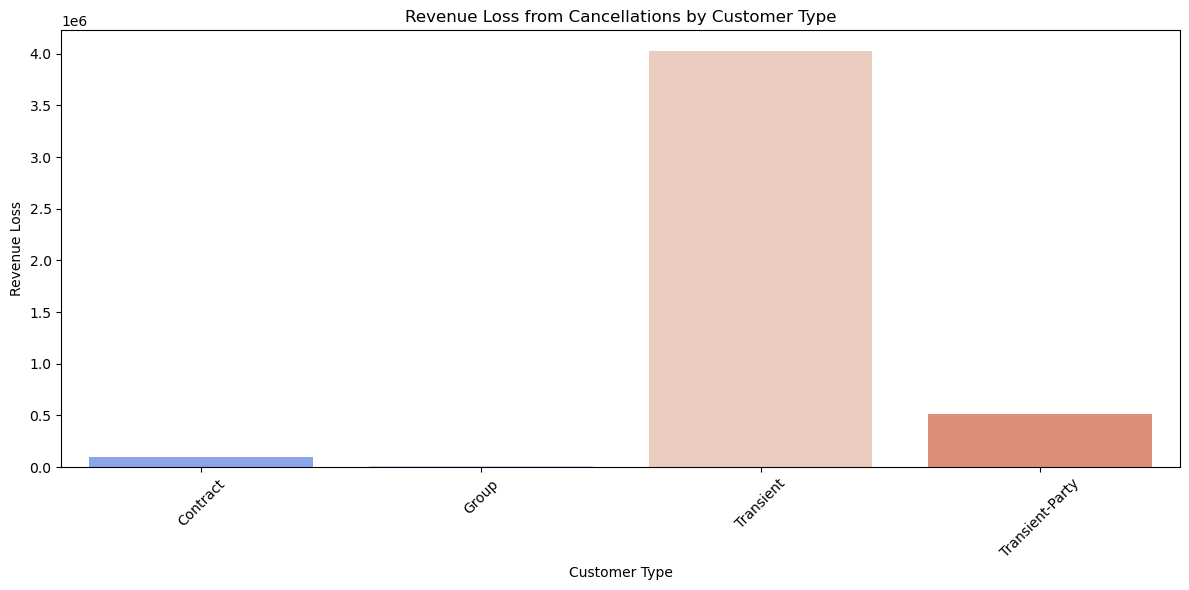

In [60]:
# Calculate the revenue loss from cancellations
df['revenue loss'] = df['avg daily rate'] * df['cancelled (0/1)']

# Group by customer segment and distribution channel to calculate total revenue loss
revenue_loss_by_type = df.groupby('customer type')['revenue loss'].sum().reset_index()
revenue_loss_by_channel = df.groupby('distribution channel')['revenue loss'].sum().reset_index()

# Plotting the revenue loss by customer type
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_loss_by_type, x='customer type', y='revenue loss', palette='coolwarm')
plt.title('Revenue Loss from Cancellations by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Revenue Loss')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

**An in-depth analysis of cancellations by customer type reveals that the Transient customer category accounts for the highest revenue loss.**

**This customer segment, typically composed of individual travelers booking for personal or short-term purposes, shows a higher cancellation frequency compared to other types like Contract, Group, or Transient-Party customers.**

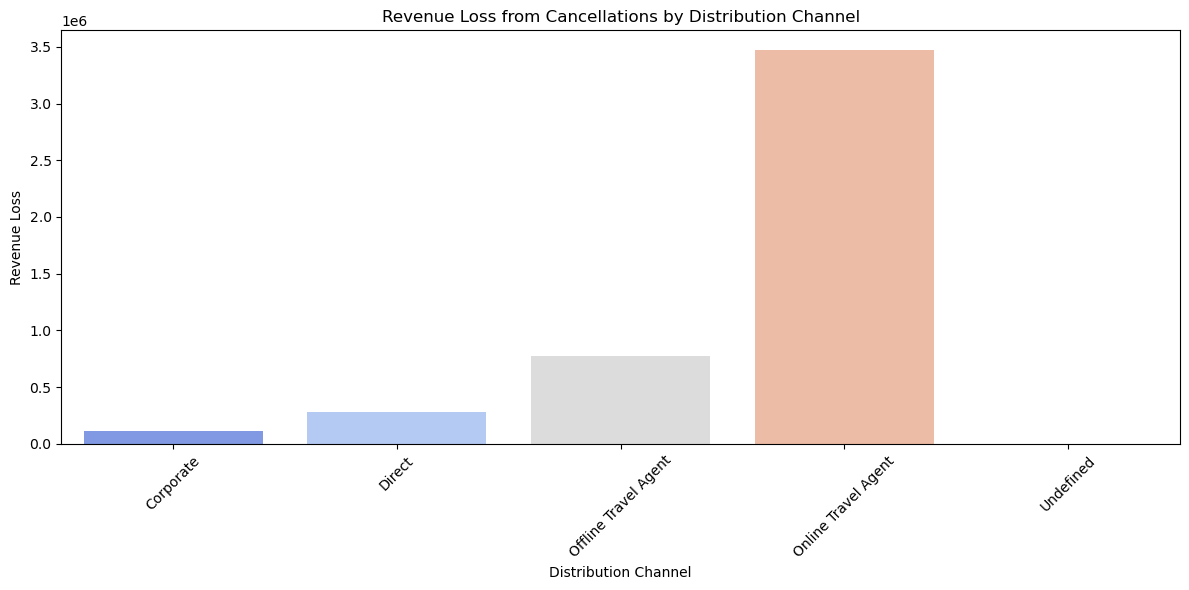

In [61]:
# Plotting the revenue loss by distribution channel
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_loss_by_channel, x='distribution channel', y='revenue loss', palette='coolwarm')
plt.title('Revenue Loss from Cancellations by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Revenue Loss')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

**The analysis indicates that Online Travel Agents (OTAs) are the leading source of revenue loss due to booking cancellations across all distribution channels. While OTAs offer wide exposure and bring in a high volume of bookings, they also exhibit a significantly higher cancellation rate, which directly impacts the hotel’s bottom line.**

**4. Revenue Optimization:**
    
**●What is the overall revenue trend, and are there specific customer segments or countries contributing significantly to revenue?**

**●Can we identify optimal pricing strategies based on the Average Daily Rate (ADR) for different customer types and distribution channels?**


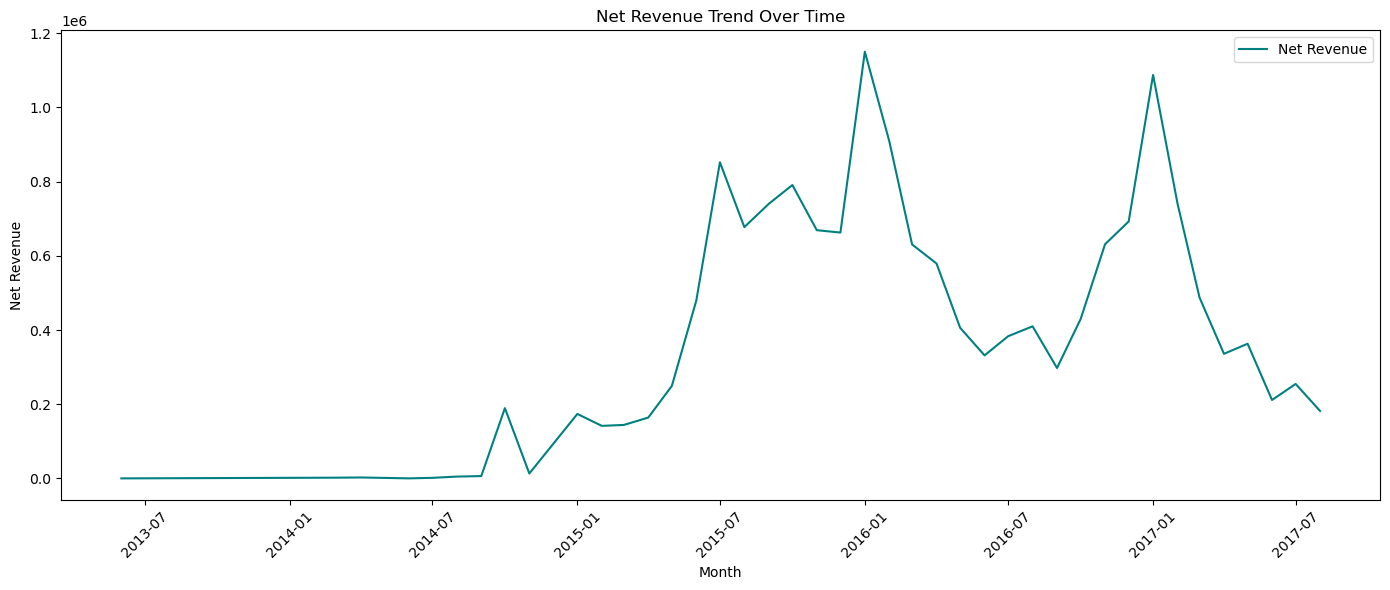

In [65]:
df['booking month'] = pd.to_datetime(df['booking date']).dt.to_period('M').dt.to_timestamp()
monthly_revenue = df.groupby('booking month')['net revenue'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_revenue, x='booking month', y='net revenue', label='Net Revenue', color='teal')
plt.title('Net Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**INSIGHTS**

**The analysis of net revenue trends over time reveals a notable peak in January 2016, marking it as the highest revenue-generating month in the observed period.**

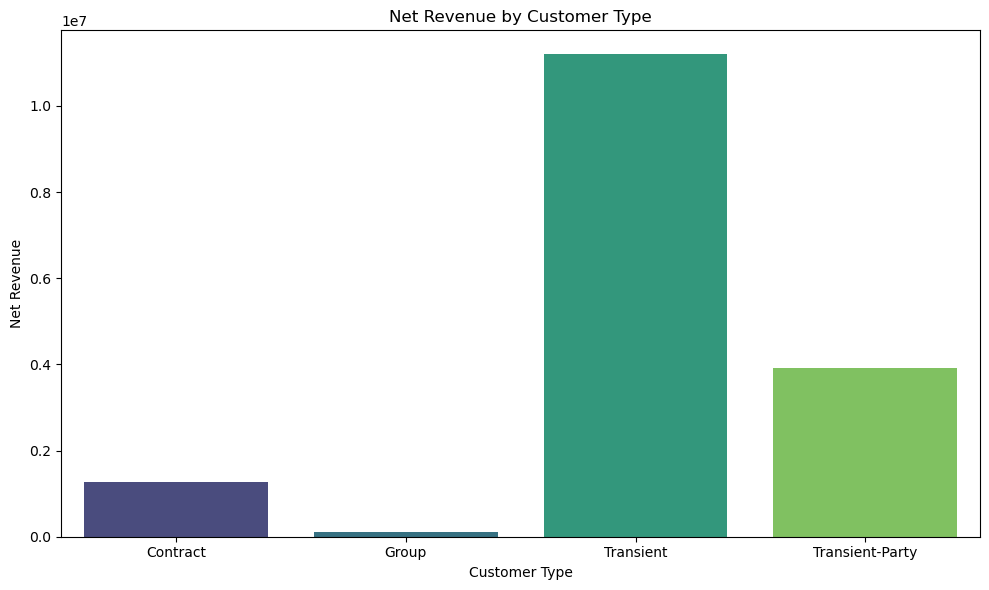

In [68]:
#by customer type
segment_rev = df.groupby('customer type')[['net revenue']].sum().reset_index()
# Plot net revenue by customer type
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_rev, x='customer type', y='net revenue', palette='viridis')
plt.title('Net Revenue by Customer Type')
plt.ylabel('Net Revenue')
plt.xlabel('Customer Type')
plt.tight_layout()
plt.show()

**INSIGHTS**

**The analysis shows that Transient customers generated the highest net revenue among all customer types. Since transient guests are the primary revenue drivers, building loyalty programs and offering direct booking incentives can enhance profitability**

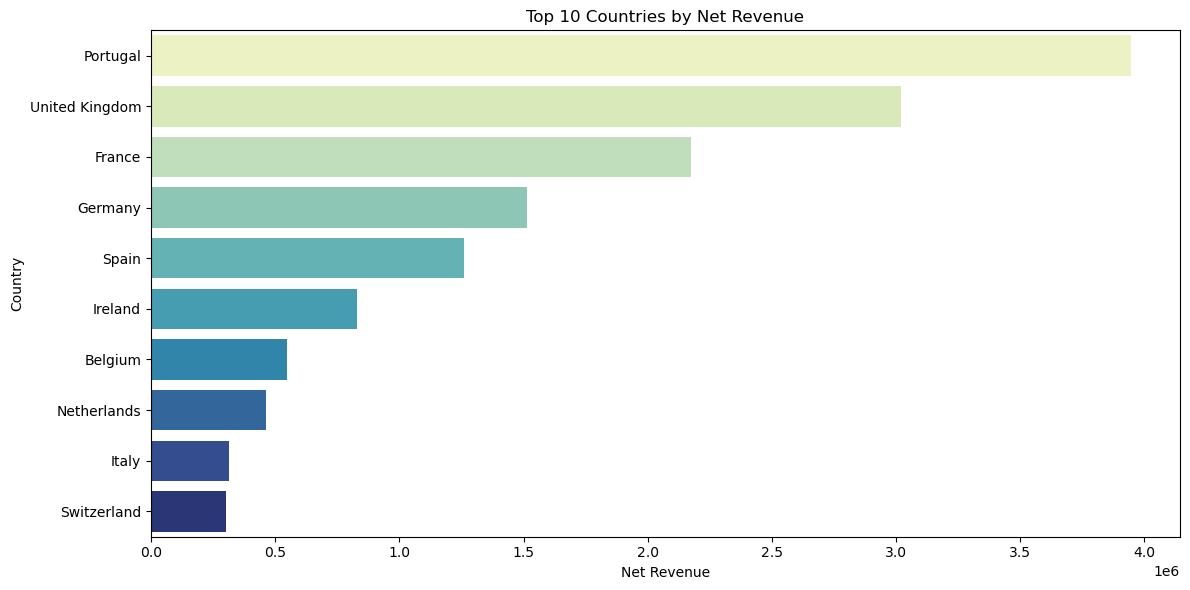

In [69]:
#by countries
top_countries = df.groupby('country')['net revenue'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='net revenue', y='country', palette='YlGnBu')
plt.title('Top 10 Countries by Net Revenue')
plt.xlabel('Net Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**INSIGHTS**

**Portugal has the highest net revenue by countries**

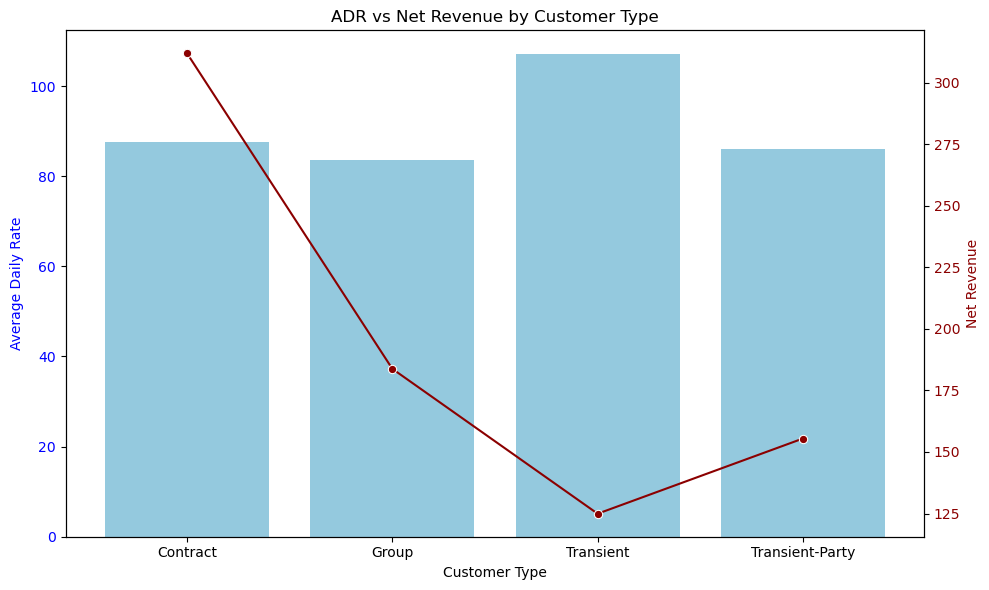

In [70]:
# by customer type
adr_customer = df.groupby('customer type')[['avg daily rate', 'net revenue']].mean().reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=adr_customer, x='customer type', y='avg daily rate', ax=ax1, color='skyblue')
ax1.set_ylabel('Average Daily Rate', color='blue')
ax1.set_xlabel('Customer Type')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
sns.lineplot(data=adr_customer, x='customer type', y='net revenue', ax=ax2, color='darkred', marker='o')
ax2.set_ylabel('Net Revenue', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
plt.title('ADR vs Net Revenue by Customer Type')
plt.tight_layout()
plt.show()


**INSIGHTS**

**A closer look at customer segmentation reveals two key insights:**

**1. Contract customers contribute the largest share of net revenue overall. While their Average Daily Rate (ADR) may be lower due to negotiated prices, the volume and reliability of their bookings make them highly valuable from a revenue standpoint.**

**2. Transient customers, on the other hand, have the highest ADR among all customer types.Despite their high ADR, they contribute less to total net revenue due to shorter stays and a higher likelihood of cancellations**

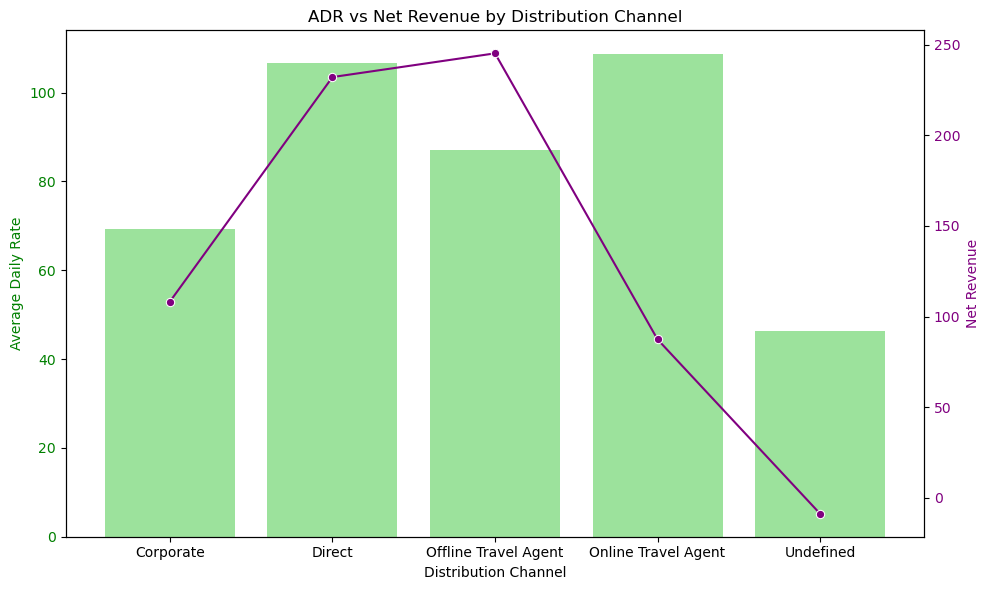

In [71]:
# by distribution channel
adr_channel = df.groupby('distribution channel')[['avg daily rate', 'net revenue']].mean().reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=adr_channel, x='distribution channel', y='avg daily rate', ax=ax1, color='lightgreen')
ax1.set_ylabel('Average Daily Rate', color='green')
ax1.set_xlabel('Distribution Channel')
ax1.tick_params(axis='y', labelcolor='green')
ax2 = ax1.twinx()
sns.lineplot(data=adr_channel, x='distribution channel', y='net revenue', ax=ax2, color='purple', marker='o')
ax2.set_ylabel('Net Revenue', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
plt.title('ADR vs Net Revenue by Distribution Channel')
plt.tight_layout()
plt.show()

**INSIGHTS**

**An analysis of distribution channels reveals an important contrast between Average Daily Rate (ADR) and Net Revenue:**

**Online Travel Agents have the Highest ADR and Offline Travel Agents Drive the Highest Net Revenue despite lower ADRs**

**5. Geographical Analysis:**
    
**●How does the distribution of guests vary across different countries, and are there specific countries that should be targeted for marketing efforts?**

**●Is there a correlation between the country of origin and the likelihood of cancellations or extended stays?**


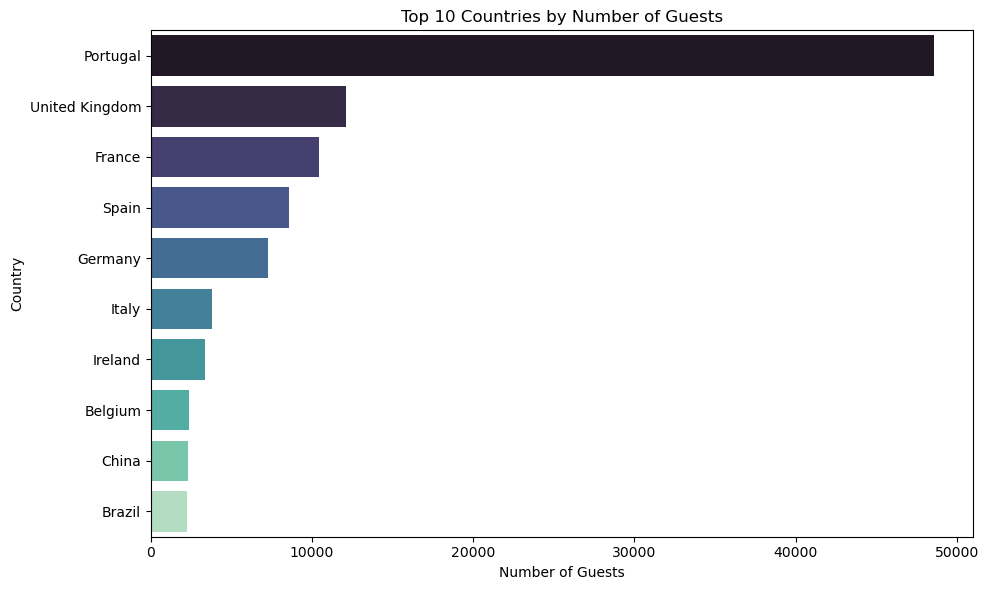

In [72]:
# Count total guests by country
guest_distribution = df['country'].value_counts().reset_index()
guest_distribution.columns = ['country', 'total_guests']
# Top 10 countries by number of guests
top_countries = guest_distribution.head(10)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='total_guests', y='country', palette='mako')
plt.title('Top 10 Countries by Number of Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

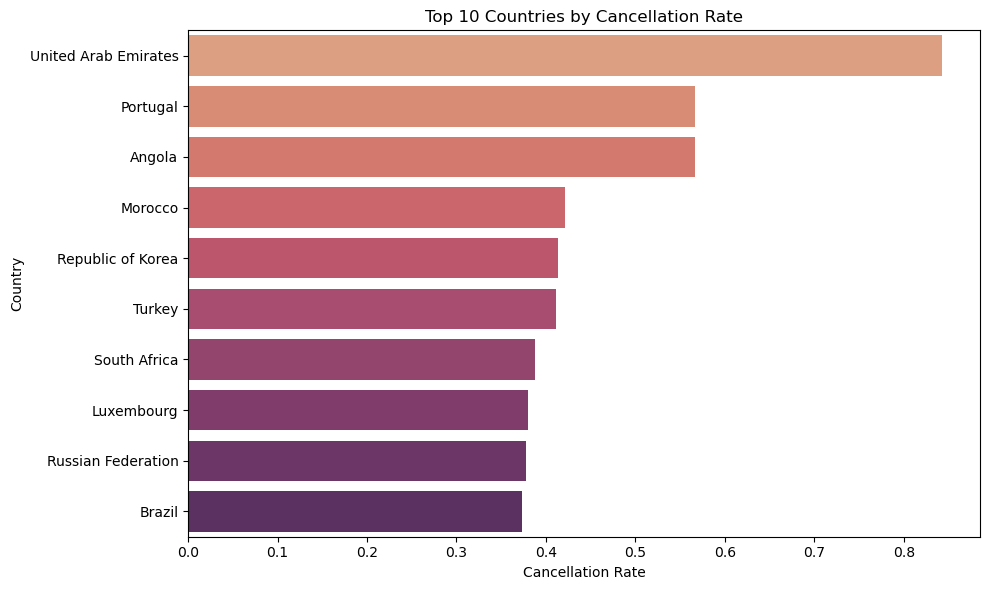

In [74]:
# Calculate cancellation rate by country
cancel_rate = df.groupby('country')['cancelled (0/1)'].mean().reset_index()
cancel_rate.columns = ['country', 'cancellation_rate']
# Top 10 countries with the highest cancellation rates (with at least N guests to avoid noise)
country_counts = df['country'].value_counts()
valid_countries = country_counts[country_counts > 50].index  # e.g., only countries with >50 guests
filtered_cancel_rate = cancel_rate[cancel_rate['country'].isin(valid_countries)].sort_values(by='cancellation_rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_cancel_rate, x='cancellation_rate', y='country', palette='flare')
plt.title('Top 10 Countries by Cancellation Rate')
plt.xlabel('Cancellation Rate')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**INSIGHTS**

**Guests from United arab Emirates have the highest cancellation rates**

**6. Operational Efficiency:**
    
**●What is the average length of stay for guests, and how does it differ based on booking channels or customer types?**

**●Are there patterns in check-out dates that can inform staffing and resource allocation strategies?**


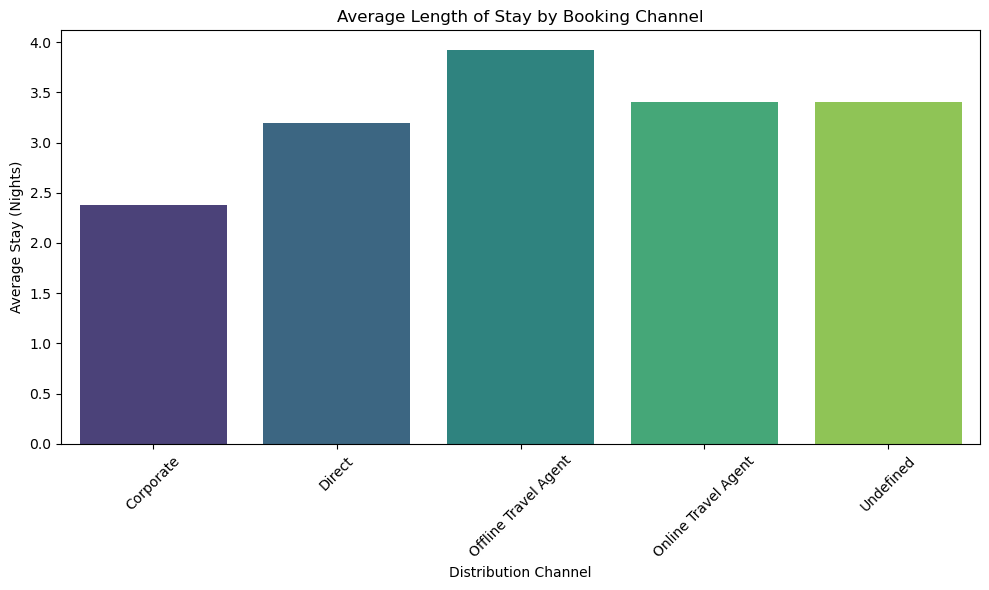

In [76]:
#average length of stay by booking channel
avg_stay_channel = df.groupby('distribution channel')['nights'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_stay_channel, x='distribution channel', y='nights', palette='viridis')
plt.title('Average Length of Stay by Booking Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Stay (Nights)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

**Guests who use the Offline Travel Agent distribution channel have the highest Average Length of Stay**

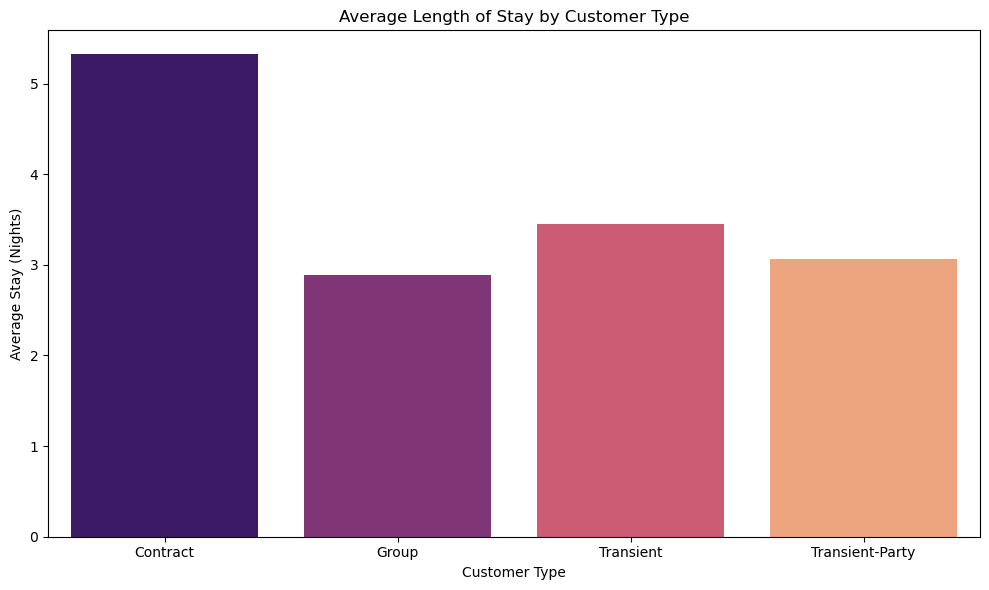

In [77]:
# by customer type
avg_stay_customer = df.groupby('customer type')['nights'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_stay_customer, x='customer type', y='nights', palette='magma')
plt.title('Average Length of Stay by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Stay (Nights)')
plt.tight_layout()
plt.show()

**INSIGHTS**

**Contract customers have the highest Average Length of Stay**

In [86]:
# Convert booking date to datetime
df['arrival date'] = pd.to_datetime(df['arrival date'])

# Estimate checkout date
df['checkout date'] = df['arrival date'] + pd.to_timedelta(df['nights'], unit='D')

# Extract day of the week for checkout
df['checkout_day'] = df['checkout date'].dt.day_name()


In [87]:
print(df[['arrival date', 'nights', 'checkout date', 'checkout_day']].head())

  arrival date  nights checkout date checkout_day
0   2015-07-01       0    2015-07-01    Wednesday
1   2015-07-01       0    2015-07-01    Wednesday
2   2015-07-01       1    2015-07-02     Thursday
3   2015-07-01       1    2015-07-02     Thursday
4   2015-07-01       2    2015-07-03       Friday


**7. Impact of Deposit Types:**
    
**●How does the presence or absence of a deposit impact the likelihood of cancellations and revenue generation?**

**●Can we identify any patterns in the use of deposit types across different customer segments?**


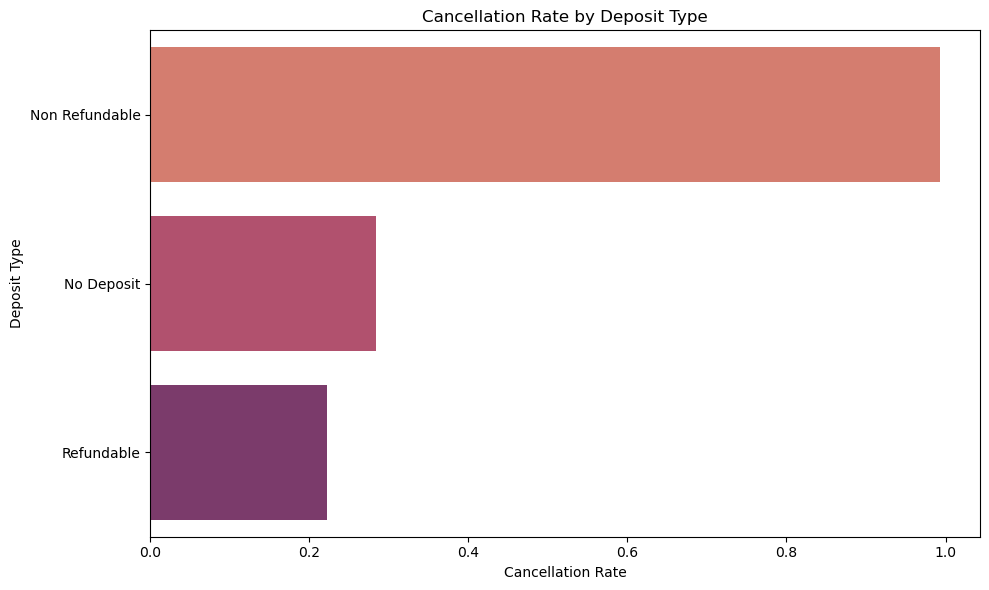

In [90]:
# Cancellation rate by deposit type
cancel_rate = df.groupby('deposit type')['cancelled (0/1)'].mean().reset_index()
cancel_rate.columns = ['deposit type', 'cancellation_rate']

# Filter out deposit types with fewer than 50 bookings to reduce noise
deposit_counts = df['deposit type'].value_counts()
valid_deposits = deposit_counts[deposit_counts > 50].index  
filtered_cancel_rate = cancel_rate[cancel_rate['deposit type'].isin(valid_deposits)].sort_values(by='cancellation_rate', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_cancel_rate, x='cancellation_rate', y='deposit type', palette='flare')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Cancellation Rate')
plt.ylabel('Deposit Type')
plt.tight_layout()
plt.show()

**INSIGHTS**

**Surprisingly, even though bookings are non-refundable, many are still canceled, possibly due to automated or bulk bookings through agencies or speculative behavior.**

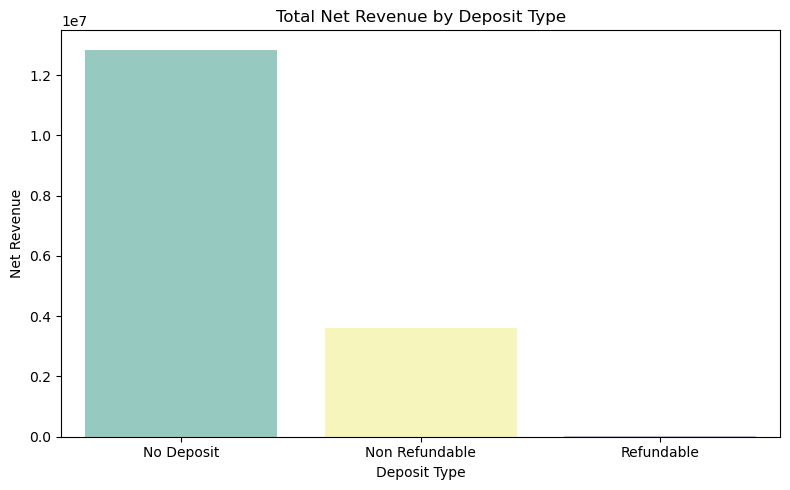

In [91]:
revenue_by_deposit = df.groupby('deposit type')['net revenue'].sum().reset_index().sort_values(by='net revenue', ascending=False)
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_by_deposit, x='deposit type', y='net revenue', palette='Set3')
plt.title('Total Net Revenue by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Net Revenue')
plt.tight_layout()
plt.show()

**INSIGHTS**

**An analysis of deposit types reveals that the "No Deposit" category accounts for the highest total net revenue among all deposit options.**

**The strong performance of the "No Deposit" category indicates its effectiveness in attracting bookings, especially through high-volume channels like Online Travel Agents**

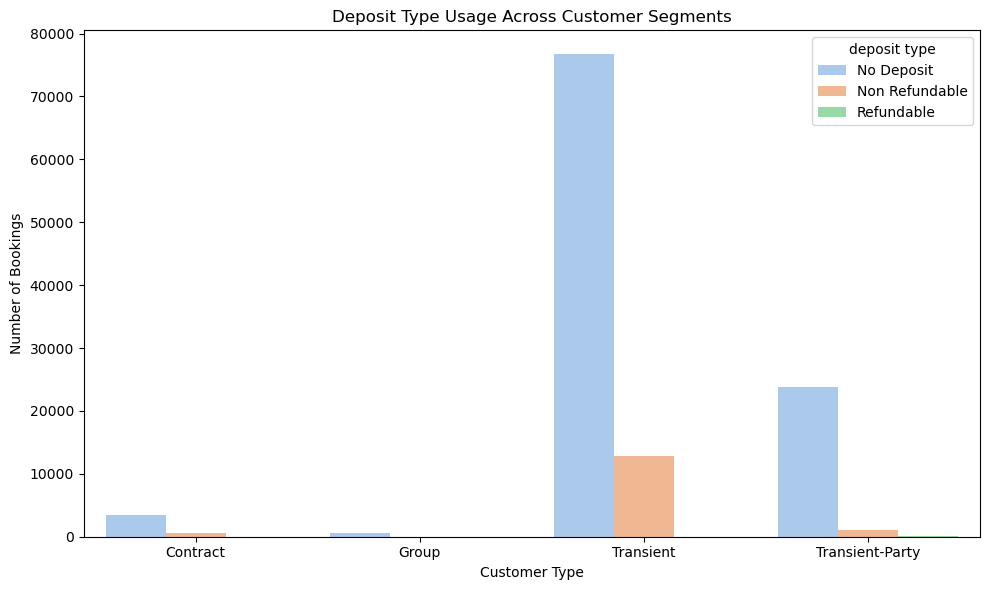

In [92]:
deposit_segment = df.groupby(['customer type', 'deposit type'])['booking id'].count().reset_index()
deposit_segment.rename(columns={'booking id': 'count'}, inplace=True)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=deposit_segment, x='customer type', y='count', hue='deposit type', palette='pastel')
plt.title('Deposit Type Usage Across Customer Segments')
plt.ylabel('Number of Bookings')
plt.xlabel('Customer Type')
plt.tight_layout()
plt.show()

**INSIGHTS**

**Analysis of deposit type usage across customer segments reveals that the 'No Deposit' option is the most commonly selected across all customer types. However, transient customers account for the highest overall transaction volume, indicating that while many customers prefer not to make deposits, transient customers are the most active users of this option.**

**8. Analysis of Corporate Bookings:**
    
**●What is the proportion of corporate bookings, and how does their Average Daily Rate (ADR) compare to other customer types?**

**●Are there specific trends or patterns related to corporate bookings that can inform business strategies?**


In [99]:
# Proportion of corporate bookings
distribution_counts = df['distribution channel'].value_counts(normalize=True) * 100
corporate_proportion = distribution_counts.get('Corporate', 0)

print(f"Corporate bookings account for {corporate_proportion:.2f}% of total bookings.")

Corporate bookings account for 5.59% of total bookings.


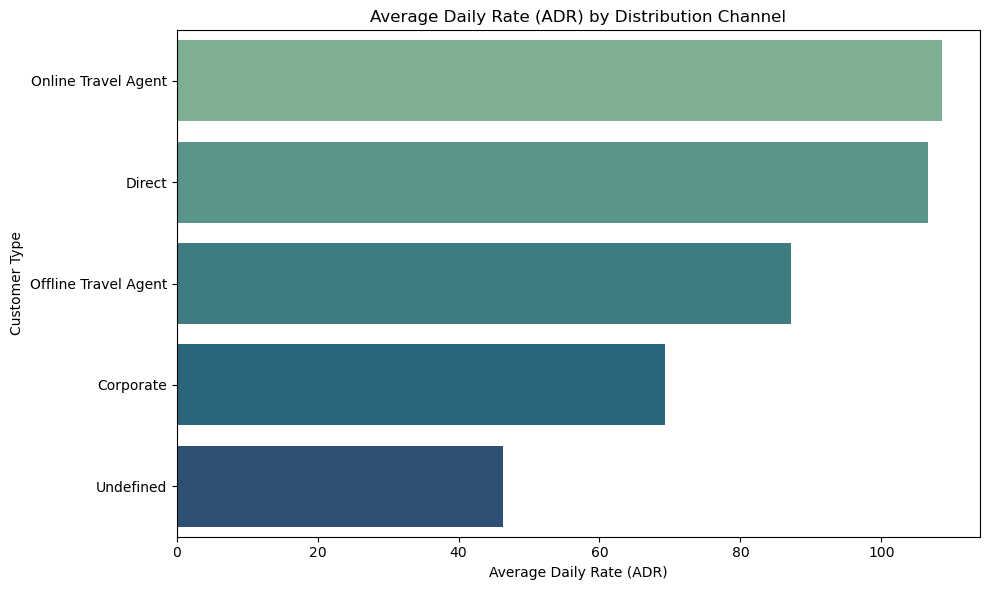

In [101]:
# Compare ADR for each distribution channel
adr_by_distribution_type = df.groupby('distribution channel')['avg daily rate'].mean().reset_index().sort_values(by='avg daily rate', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=adr_by_distribution_type, x='avg daily rate', y='distribution channel', palette='crest')
plt.title('Average Daily Rate (ADR) by Distribution Channel')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Customer Type')
plt.tight_layout()
plt.show()

**INSIGHTS**

**An analysis of the Average Daily Rate (ADR) across distribution channels shows that online travel agents yield the highest ADR, indicating that bookings made through these platforms tend to generate more revenue per day compared to other channels.**

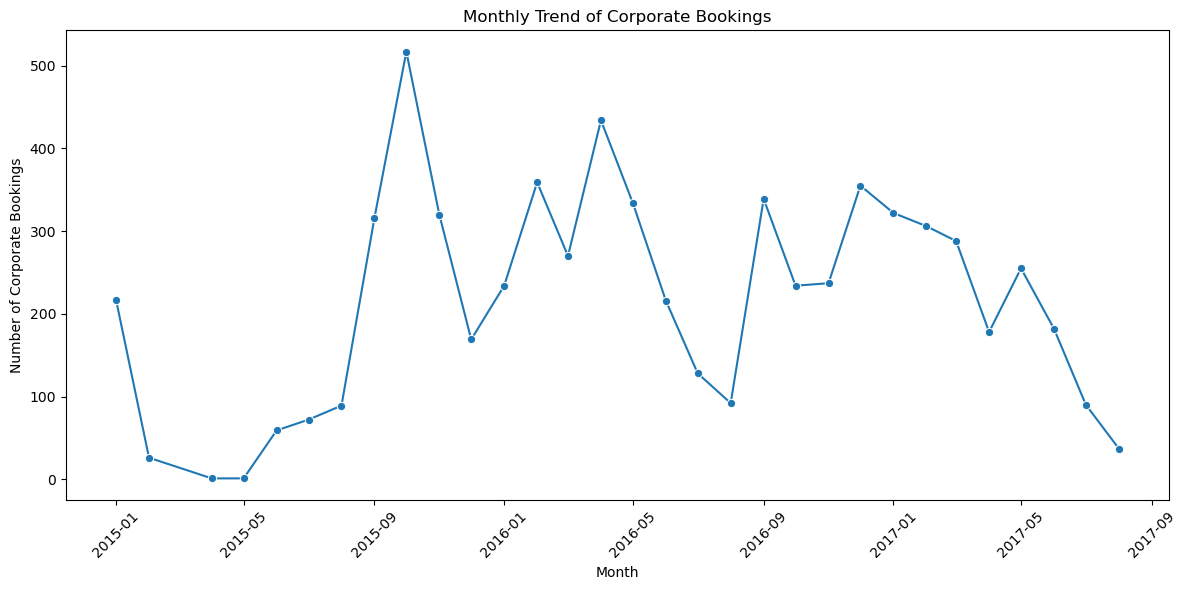

In [105]:
# Convert date if not already
df['booking date'] = pd.to_datetime(df['booking date'])
df['booking month'] = df['booking date'].dt.to_period('M').dt.to_timestamp()

# Filter only corporate bookings
corporate_df = df[df['distribution channel'] == 'Corporate']

# Trend over time
monthly_corporate = corporate_df.groupby('booking month').size().reset_index(name='corporate_bookings')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_corporate, x='booking month', y='corporate_bookings', marker='o')
plt.title('Monthly Trend of Corporate Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Corporate Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHTS**

**The monthly trend of corporate bookings indicates a peak in September 2015, suggesting a significant surge in business-related reservations during that period.**

**9. Time-to-Event Analysis:**
    
**●How does the time between booking and arrival date (lead time) affect revenue and the likelihood of cancellations?**

**●Are there specific lead time ranges that are associated with higher customer satisfaction or revenue?**


In [106]:
# Create lead time bins
df['lead_time_group'] = pd.cut(df['lead time'], bins=[0, 7, 14, 30, 60, 90, 180, 365, df['lead time'].max()],
                               labels=['0-7', '8-14', '15-30', '31-60', '61-90', '91-180', '181-365', '365+'])
lead_time_analysis = df.groupby('lead_time_group').agg(
    avg_net_revenue=('net revenue', 'mean'),
    cancellation_rate=('cancelled (0/1)', 'mean'),
    bookings=('booking id', 'count')
).reset_index()

# Convert cancellation rate to %
lead_time_analysis['cancellation_rate'] *= 100


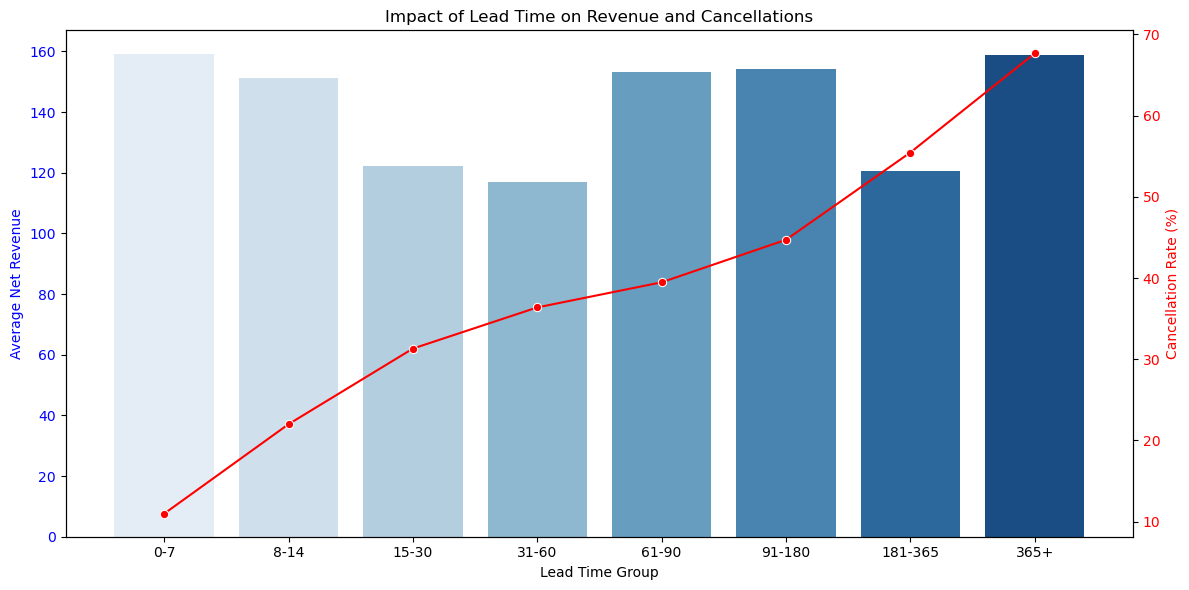

In [107]:
# Dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barplot for average net revenue
sns.barplot(data=lead_time_analysis, x='lead_time_group', y='avg_net_revenue', ax=ax1, palette='Blues')
ax1.set_ylabel('Average Net Revenue', color='blue')
ax1.set_xlabel('Lead Time Group')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Impact of Lead Time on Revenue and Cancellations')

# Line plot for cancellation rate
ax2 = ax1.twinx()
sns.lineplot(data=lead_time_analysis, x='lead_time_group', y='cancellation_rate', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Cancellation Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

In [108]:
# Sort to spot patterns of Some Lead Time Ranges More Profitable or Reliable
print(lead_time_analysis.sort_values(by='avg_net_revenue', ascending=False))

  lead_time_group  avg_net_revenue  cancellation_rate  bookings
0             0-7       159.024879          10.984255     13401
7            365+       158.885289          67.662008      3148
5          91-180       154.126687          44.710466     26439
4           61-90       153.237156          39.473893     12583
1            8-14       151.361655          22.003985      7026
2           15-30       122.255065          31.313893     11934
6         181-365       120.477703          55.453955     21544
3           31-60       116.940038          36.381850     16970


**INSIGHTS**

**Bookings with lead times of 365 days or more exhibit the highest cancellation rates as well as the highest average net revenue, likely due to their long planning horizon and larger group or high-value bookings. In contrast, bookings made within 0–7 days of arrival have the lowest cancellation rates and also show a high average net revenue, indicating strong commitment and potentially last-minute premium pricing.**

**10. Comparison of Online and Offline Travel Agents:**
    
**●What is the revenue contribution of online travel agents compared to offline travel agents?**

**●How do cancellation rates and revenue vary between bookings made through online and offline travel agents?**


In [109]:
# Simplify distribution channel values
df['agent_type'] = df['distribution channel'].apply(lambda x: 'Online Travel Agent' if 'online' in x.lower()
                                                    else 'Offline Travel Agent' if 'offline' in x.lower()
                                                    else 'Other')

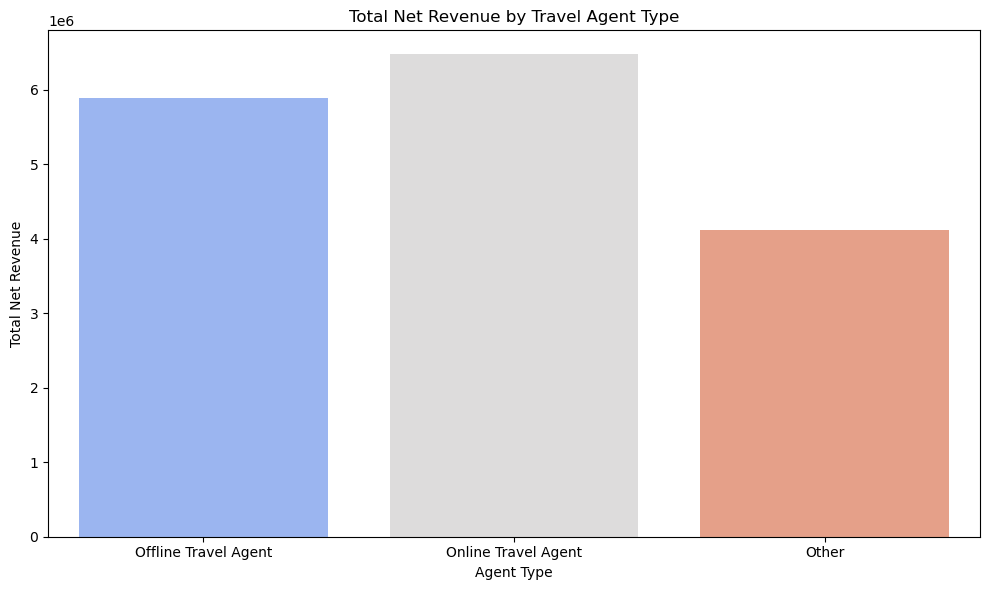

In [110]:
revenue_by_agent = df.groupby('agent_type').agg(
    total_net_revenue=('net revenue', 'sum'),
    avg_net_revenue=('net revenue', 'mean'),
    total_bookings=('booking id', 'count')
).reset_index()

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_agent, x='agent_type', y='total_net_revenue', palette='coolwarm')
plt.title('Total Net Revenue by Travel Agent Type')
plt.ylabel('Total Net Revenue')
plt.xlabel('Agent Type')
plt.tight_layout()
plt.show()

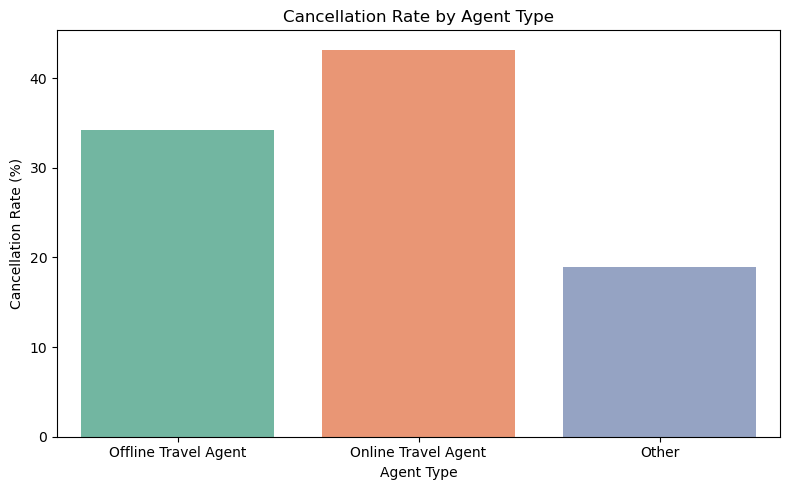

In [111]:
cancel_by_agent = df.groupby('agent_type')['cancelled (0/1)'].mean().reset_index()
cancel_by_agent['cancelled (0/1)'] *= 100  # convert to %
cancel_by_agent.columns = ['agent_type', 'cancellation_rate (%)']
# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(data=cancel_by_agent, x='agent_type', y='cancellation_rate (%)', palette='Set2')
plt.title('Cancellation Rate by Agent Type')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Agent Type')
plt.tight_layout()
plt.show()

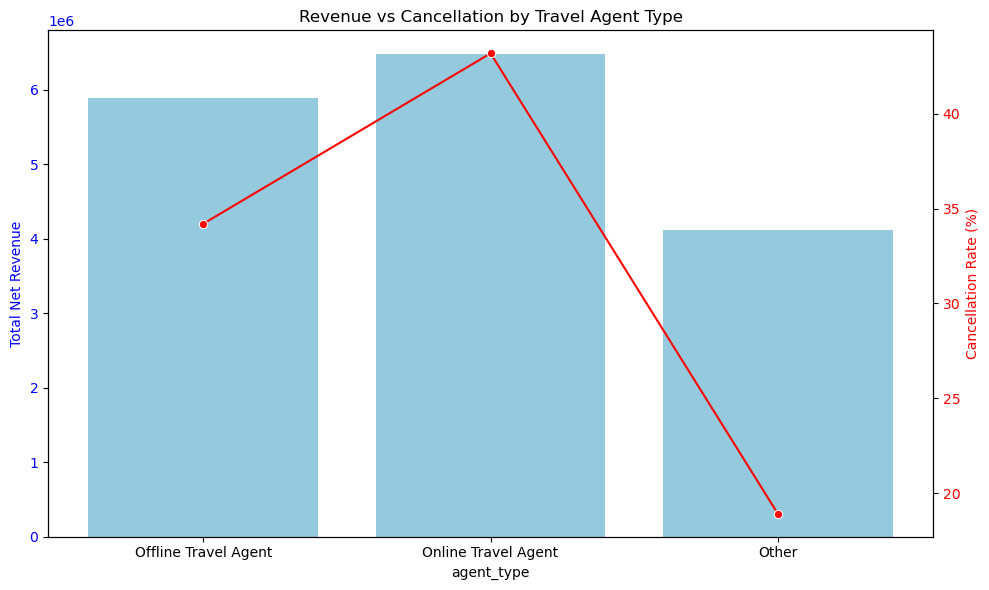

In [112]:
combined = revenue_by_agent.merge(cancel_by_agent, on='agent_type')
fig, ax1 = plt.subplots(figsize=(10, 6))
# Barplot: Total revenue
sns.barplot(data=combined, x='agent_type', y='total_net_revenue', ax=ax1, color='skyblue')
ax1.set_ylabel('Total Net Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot: Cancellation rate
ax2 = ax1.twinx()
sns.lineplot(data=combined, x='agent_type', y='cancellation_rate (%)', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Cancellation Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Revenue vs Cancellation by Travel Agent Type')
plt.tight_layout()
plt.show()

**INSIGHTS**

**Online travel agents contribute the highest total revenue among all distribution channels. However, they also record the highest cancellation rate, highlighting a trade-off between revenue generation and booking reliability.**